In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Perceptron

It is based on a slightly different artificial neuron called
a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs
and output are numbers (instead of binary on/off values), and each input connection
is associated with a weight.

A single TLU can be used for simple linear binary classification. It computes a linear
combination of the inputs, and if the result exceeds a threshold, it outputs the posi‐
tive class. Otherwise it outputs the negative class (just like a Logistic Regression or
linear SVM classifier).


A Perceptron is simply composed of a single layer of TLUs,7 with each TLU connected
to all the inputs. When all the neurons in a layer are connected to every neuron in the
previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a
dense layer. The inputs of the Perceptron are fed to special passthrough neurons
called input neurons: they output whatever input they are fed. All the input neurons
form the input layer.

### Training Perceptron


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length and width
y = (iris.target == 0).astype(np.int) # iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highligh‐
ted a number of serious weaknesses of Perceptrons—in particular, the fact that they
are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classifi‐
cation problem; see the left side of Figure 10-6). This is true of any other linear classi‐
fication model (such as Logistic Regression classifiers), but researchers had expected
much more from Perceptrons, and some were so disappointed that they dropped
neural networks altogether in favor of higher-level problems such as logic, problem
solving, and search.


It turns out that some of the limitations of Perceptrons can be eliminated by stacking
multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP).

## The Multilayer Perceptron and Backpropagation
An MLP is composed of one (passthrough) input layer, one or more layers of TLUs,
called hidden layers, and one final layer of TLUs called the output layer.

When an ANN contains a deep stack of hidden layers,9 it is called a deep neural net‐
work (DNN). The field of Deep Learning studies DNNs, and more generally models
containing deep stacks of computations.

#### Backpropagation
which is still used today. In short, it is Gradient Descent (introduced in Chapter 4)
using an efficient technique for computing the gradients automatically:11 in just two
passes through the network (one forward, one backward), the backpropagation algo‐
rithm is able to compute the gradient of the network’s error with regard to every sin‐
gle model parameter. In other words, it can find out how each connection weight and
each bias term should be tweaked in order to reduce the error. Once it has these gra‐
dients, it just performs a regular Gradient Descent step, and the whole process is 
repeated until the network converges to the solution.

# Tensorflow 2 with Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

### Build fashion MNIST classifier using Keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
# create validation set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # turn values down to 0-1 range
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

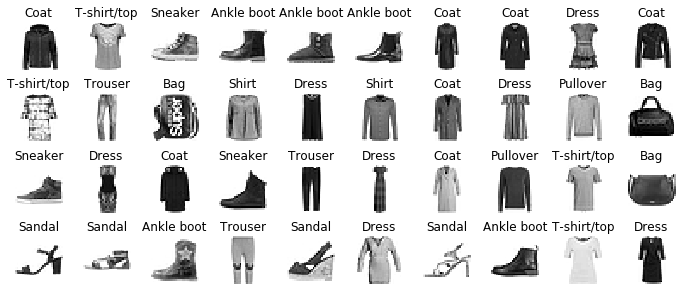

In [11]:
# sample images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Creating the model using the Sequential API

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers con‐
nected sequentially. This is called the Sequential API.

- Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is to convert each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have any parameters; it is just
there to do some simple preprocessing. Since it is the first layer in the model, you
should specify the input_shape, which doesn’t include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting input_shape=[28,28].

- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐
tion function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vec‐
tor of bias terms (one per neuron). When it receives some input data, it computes
Equation 10-2.

- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.

- Finally, we add a Dense output layer with 10 neurons (one per class), using the 
softmax activation function


In [13]:
# alternatively, we can do it by passing a list of layers:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection weights
and the bias terms:

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.06759852, -0.05747052, -0.0173961 , ..., -0.02978399,
        -0.00626224, -0.02498589],
       [-0.05974647, -0.06140886,  0.02833588, ...,  0.00240608,
        -0.00218003,  0.03710108],
       [-0.01839593,  0.00414585, -0.03925536, ..., -0.02234956,
         0.01319977, -0.02469237],
       ...,
       [-0.05488785,  0.04180653,  0.02816668, ...,  0.00588322,
         0.02755482, -0.06335282],
       [ 0.05054529, -0.02674918, -0.05233238, ...,  0.0100119 ,
        -0.05869707, -0.00991894],
       [ 0.04738549,  0.04562361, -0.05300548, ...,  0.05387424,
         0.05105962,  0.01791743]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

### Compiling the model

In [23]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

- First, we use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a tar‐
get class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

- Regarding the optimizer, "sgd" means that we will train the model using simple Sto‐
chastic Gradient Descent. In other words, Keras will perform the backpropagation
algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent).

- Finally, since this is a classifier, it’s useful to measure its "accuracy" during training 
and evaluation

In [24]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 42us/sample - loss: 0.7394 - accuracy: 0.7604 - val_loss: 0.5277 - val_accuracy: 0.8220
Epoch 2/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.4948 - accuracy: 0.8272 - val_loss: 0.4462 - val_accuracy: 0.8432
Epoch 3/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.4496 - accuracy: 0.8432 - val_loss: 0.4179 - val_accuracy: 0.8584
Epoch 4/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.4223 - accuracy: 0.8521 - val_loss: 0.4164 - val_accuracy: 0.8532
Epoch 5/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.4009 - accuracy: 0.8600 - val_loss: 0.4035 - val_accuracy: 0.8620
Epoch 6/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3850 - accuracy: 0.8653 - val_loss: 0.4103 - val_accuracy: 0.8562
Epoch 7/30
55000/55000 [==============================] -

(0, 1)

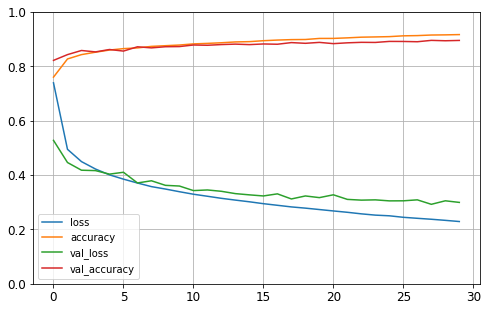

In [25]:
# plot the training history

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

### Making predictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# or only show the highest estimated class

y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Saving figure fashion_mnist_images_plot


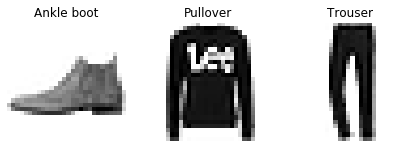

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### Building a Regression MLP Using the Sequential API

Let’s switch to the California housing problem and tackle it using a regression neural
network. For simplicity, we will use Scikit-Learn’s fetch_california_housing()
function to load the data.

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
                    
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.9965 - val_loss: 0.6737
Epoch 2/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5142 - val_loss: 0.4937
Epoch 3/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4600 - val_loss: 0.4731
Epoch 4/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4405 - val_loss: 0.4573
Epoch 5/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4260 - val_loss: 0.4561
Epoch 6/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4215 - val_loss: 0.4350
Epoch 7/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4113 - val_loss: 0.4335
Epoch 8/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4076 - val_loss: 0.4288
Epoch 9/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3973 - val_l

In [32]:
y_pred

array([[0.6591326],
       [1.4619914],
       [3.693172 ]], dtype=float32)

## Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network.
This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng
et al.16 It connects all or part of the inputs directly to the output layer, as shown in
Figure 10-14. This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path).

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

- First, we need to create an Input object.18 This is a specification of the kind of
input the model will get, including its shape and dtype. A model may actually
have multiple inputs, as we will see shortly.

- Next, we create a Dense layer with 30 neurons, using the ReLU activation func‐
tion. As soon as it is created, notice that we call it like a function, passing it the
input. This is why this is called the Functional API. Note that we are just telling
Keras how it should connect the layers together; no actual data is being processed
yet.

- We then create a second hidden layer, and again we use it as a function. Note that
we pass it the output of the first hidden layer.

- Next, we create a Concatenate layer, and once again we immediately use it like a
function, to concatenate the input and the output of the second hidden layer. You
may prefer the keras.layers.concatenate() function, which creates a
Concatenate layer and immediately calls it with the given inputs.

- Then we create the output layer, with a single neuron and no activation function,
and we call it like a function, passing it the result of the concatenation.

- Lastly, we create a Keras Model, specifying which inputs and outputs to use.

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

### Multiple inputs

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
# compile and make
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

In [37]:
# compile and fit
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: 2.4972 - val_loss: 1.0329
Epoch 2/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.8775 - val_loss: 0.7889
Epoch 3/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.7461 - val_loss: 0.7134
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6903 - val_loss: 0.6724
Epoch 5/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.6535 - val_loss: 0.6445
Epoch 6/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6258 - val_loss: 0.6209
Epoch 7/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.6033 - val_loss: 0.6013
Epoch 8/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5839 - val_loss: 0.5852
Epoch 9/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5669 - val_l

In [38]:
# add an auxilidary output

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [39]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 50us/sample - loss: 1.2310 - main_output_loss: 1.1324 - aux_output_loss: 2.1142 - val_loss: 0.7870 - val_main_output_loss: 0.7069 - val_aux_output_loss: 1.5072
Epoch 2/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6627 - main_output_loss: 0.5853 - aux_output_loss: 1.3647 - val_loss: 0.6495 - val_main_output_loss: 0.5798 - val_aux_output_loss: 1.2758
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6663 - main_output_loss: 0.6056 - aux_output_loss: 1.2118 - val_loss: 0.6566 - val_main_output_loss: 0.6024 - val_aux_output_loss: 1.1438
Epoch 4/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5887 - main_output_loss: 0.5371 - aux_output_loss: 1.0524 - val_loss: 0.5602 - val_main_output_loss: 0.5134 - val_aux_output_loss: 0.9803
Epoch 5/20
11610/11610 [==============================] - 0s 28us/s

In [40]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 15us/sample - loss: 0.3714 - main_output_loss: 0.3590 - aux_output_loss: 0.4792


In [41]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [42]:
y_pred_main

array([[0.43879098],
       [1.6458058 ],
       [3.0446224 ]], dtype=float32)

In [43]:
y_pred_aux

array([[0.57696843],
       [1.9251399 ],
       [2.6206295 ]], dtype=float32)

## Using the Subclassing API to Build Dynamic Models

In [44]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

#### Saving and restoring

```
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

model = keras.models.load_model("my_keras_model.h5")

```
### Using callbacks

In [45]:
# Saves the model at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

TypeError: You are attempting to use Python control flow in a layer that was not declared to be dynamic. Pass `dynamic=True` to the class constructor.
Encountered error:
"""
in converted code:

    <ipython-input-44-510b91ab4a06>:10 call  *
        input_A, input_B = inputs
    /home/amuweee/python_projects/handson_ml/.venv/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:539 __iter__
        self._disallow_iteration()
    /home/amuweee/python_projects/handson_ml/.venv/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:535 _disallow_iteration
        self._disallow_in_graph_mode("iterating over `tf.Tensor`")
    /home/amuweee/python_projects/handson_ml/.venv/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:515 _disallow_in_graph_mode
        " this function with @tf.function.".format(task))

    OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.

"""

Moreover, if you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint. 

In [46]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

ValueError: ('Error when checking model target: expected no data, but got:', array([0.959, 2.436, 3.022, ..., 1.083, 0.912, 2.374]))

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

ValueError: ('Error when checking model target: expected no data, but got:', array([0.959, 2.436, 3.022, ..., 1.083, 0.912, 2.374]))

The number of epochs can be set to a large value since training will stop automati‐
cally when there is no more progress. In this case, there is no need to restore the best
model saved because the EarlyStopping callback will keep track of the best weights
and restore them for you at the end of training.

## Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to view the
learning curves during training, compare learning curves between multiple runs, vis‐
ualize the computation graph, analyze training statistics, view images generated by
your model, visualize complex multidimensional data projected down to 3D and
automatically clustered for you, and more! This tool is installed automatically when
you install TensorFlow, so you already have it.

To use it, you must modify your program so that it outputs the data you want to visu‐
alize to special binary log files called event files. Each binary data record is called a
summary.

In [48]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [49]:
run_logdir

'./my_logs/run_2020_05_20-21_45_28'

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 0s 39us/sample - loss: 1.6718 - val_loss: 0.7678
Epoch 2/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.7206 - val_loss: 0.6990
Epoch 3/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6665 - val_loss: 0.6600
Epoch 4/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6305 - val_loss: 0.6299
Epoch 5/30
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6029 - val_loss: 0.6060
Epoch 6/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5812 - val_loss: 0.5873
Epoch 7/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5625 - val_loss: 0.5744
Epoch 8/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5475 - val_loss: 0.5580
Epoch 9/30
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5341 - val_l

Next you need to start the TensorBoard server. One way to do this is by running a
command in a terminal. If you installed TensorFlow within a virtualenv, you should
activate it. Next, run the following command at the root of the project (or from any‐
where else, as long as you point to the appropriate log directory):

```
$ tensorboard --logdir=./my_logs --port=6006
TensorBoard 2.0.0 at http://mycomputer.local:6006/ (Press CTRL+C to quit)
```

Additionally, TensorFlow offers a lower-level API in the tf.summary package. The
following code creates a SummaryWriter using the create_file_writer() function,
and it uses this writer as a context to log scalars, histograms, images, audio, and text,
all of which can then be visualized using TensorBoard (give it a try!):

In [51]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

One option is to simply try many combinations of hyperparameters and see which
one works best on the validation set (or use K-fold cross-validation). For example, we
can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space,
as we did in Chapter 2. To do this, we need to wrap our Keras models in objects that
mimic regular Scikit-Learn regressors. The first step is to create a function that will
build and compile a Keras model, given a set of hyperparameters:

In [52]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

This function creates a simple Sequential model for univariate regression (only one
output neuron), with the given input shape and the given number of hidden layers
and neurons, and it compiles it using an SGD optimizer configured with the specified
learning rate. It is good practice to provide reasonable defaults to as many hyperpara‐
meters as you can, as Scikit-Learn does.

Next, let’s create a KerasRegressor based on this build_model() function:

In [53]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using
build_model(). Since we did not specify any hyperparameters when creating it, it
will use the default hyperparameters we defined in build_model(). Now we can use
this object like a regular Scikit-Learn regressor: we can train it using its fit()
method, then evaluate it using its score() method, and use it to make predictions
using its predict() method, as you can see in the following code:

In [54]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.5232 - val_loss: 0.7676
Epoch 2/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.7436 - val_loss: 0.6661
Epoch 3/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6181 - val_loss: 0.5974
Epoch 4/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5606 - val_loss: 0.5598
Epoch 5/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5286 - val_loss: 0.5317
Epoch 6/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5069 - val_loss: 0.5141
Epoch 7/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4925 - val_loss: 0.5030
Epoch 8/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4826 - val_loss: 0.4967
Epoch 9/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.475

We don’t want to train and evaluate a single model like this, though we want to train
hundreds of variants and see which one performs best on the validation set. Since
there are many hyperparameters, it is preferable to use a randomized search rather
than grid search (as we discussed in Chapter 2). Let’s try to explore the number of
hidden layers, the number of neurons, and the learning rate:

In [55]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

TypeError: Singleton array array(100) cannot be considered a valid collection.